Khai báo các thư viện cần thiết

In [1]:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

Thư viện để vẽ biểu đồ bóng đá

In [2]:
import mplsoccer
from scipy.ndimage import  gaussian_filter
from mplsoccer.heatmap import bin_statistic

khai báo thư viện để vẽ các biểu đồ để so sánh

In [3]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

CR7

cào dữ liệu thống kê của Cristiano Ronaldo từ web https://understat.com

In [4]:
cr7_scrape_url = "https://understat.com/player/2371"
page_connect = urlopen(cr7_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cr7_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
cr7_season_wise_meta_df.insert(0, "Player", "Cristiano")

In [5]:
cr7_season_wise_meta_df

Player position games goals shots  time                   xG assists  \
0  Cristiano      Sub    10     1    25   517   2.1407176107168198       0   
1  Cristiano       FW    30    18   110  2468   17.212839871644974       3   
2  Cristiano      Sub     1     0     1    28  0.20496894419193268       0   
3  Cristiano       FW    33    29   167  2807    29.83808070421219       3   
4  Cristiano      FWL    33    31   208  2920   29.431679474189878       5   
5  Cristiano       FW    31    21   175  2692    23.32403990253806       8   
6  Cristiano       FW    27    26   178  2304   26.999303579330444       5   
7  Cristiano      FWL    29    25   162  2546   25.413737758994102       6   
8  Cristiano      AML    36    35   227  3186    35.58900645375252      11   
9  Cristiano      FWL    35    48   225  3103    39.30876067932695      16   

                    xA key_passes season               team yellow red npg  \
0   0.3078584298491478          6   2022  Manchester United      2   0   1   
1    4.424966126680374         26   2021  Manchester United      8   0  15   
2  0.03537696972489357          1   2021           Juventus      1   0   0   
3   3.8546393513679504         36   2020           Juventus      3   0  23   
4    6.067225832492113         51   2019           Juventus      3   0  19   
5    5.193873833864927         48   2018           Juventus      3   0  16   
6    5.524841643869877         40   2017        Real Madrid      1   0  23   
7    4.591035931371152         31   2016        Real Madrid      4   0  19   
8    8.606404347345233         51   2015        Real Madrid      3   0  29   
9   13.600642347708344         76   2014        Real Madrid      5   1  38   

                  npxG               xGChain             xGBuildup  
0   2.1407176107168198     2.957992449402809    0.9433605782687664  
1    14.92933338880539     23.25371290743351     7.720640169456601  
2  0.20496894419193268  0.051310088485479355  0.015933118760585785  
3    23.74781009554863    28.635406404733658     8.915717896074057  
4    19.53495633788407      26.5536093339324     7.224641568958759  
5    18.75628685578704    21.854169853031635     7.177339139394462  
6    24.02619305253029     31.62383733689785      9.47185287065804  
7   19.467644795775414     29.57457834482193     8.661094894632697  
8   28.899507626891136     40.81802845001221     9.863004602491856  
9   30.389685845933855     43.60801999177784    7.5202372539788485

chuyển về file csv

In [6]:
cr7_season_wise_meta_df.to_csv(r'C:\Users\THANG\Desktop\pythonproject\dataCR7_Season.csv', sep='\t', encoding='utf-8')

cào data những cú sút thành bàn của Ronaldo

In [7]:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cr7_shots_df = pd.json_normalize(json.loads(json_data))
cr7_shots_df.insert(0, "Player", "Cristiano")

In [8]:
cr7_shots_df

Player      id minute       result                   X  \
0     Cristiano   32535     18    SavedShot               0.845   
1     Cristiano   32551     85  BlockedShot  0.7680000305175781   
2     Cristiano   32552     89         Goal  0.7080000305175781   
3     Cristiano   32912     13  MissedShots  0.8159999847412109   
4     Cristiano   32917     25         Goal               0.885   
...         ...     ...    ...          ...                 ...   
1473  Cristiano  497355     62  BlockedShot  0.8159999847412109   
1474  Cristiano  497358     73  BlockedShot  0.7230000305175781   
1475  Cristiano  498586     33    SavedShot                0.91   
1476  Cristiano  498592     52  MissedShots                0.78   
1477  Cristiano  498594     72  BlockedShot  0.7419999694824219   

                        Y                    xG             player h_a  \
0     0.49900001525878906   0.06659495085477829  Cristiano Ronaldo   h   
1                   0.625   0.03090905211865902  Cristiano Ronaldo   h   
2      0.6719999694824219  0.022334257140755653  Cristiano Ronaldo   h   
3                   0.245   0.02082291804254055  Cristiano Ronaldo   h   
4                     0.5    0.7432776093482971  Cristiano Ronaldo   h   
...                   ...                   ...                ...  ..   
1473  0.38799999237060545   0.06472182273864746  Cristiano Ronaldo   h   
1474   0.6419999694824219   0.02039007470011711  Cristiano Ronaldo   h   
1475  0.40299999237060546    0.3018024265766144  Cristiano Ronaldo   a   
1476                 0.35  0.025649627670645714  Cristiano Ronaldo   a   
1477                0.515   0.05908546224236488  Cristiano Ronaldo   a   

     player_id  ... season   shotType match_id             h_team  \
0         2371  ...   2014  RightFoot     5834        Real Madrid   
1         2371  ...   2014   LeftFoot     5834        Real Madrid   
2         2371  ...   2014  RightFoot     5834        Real Madrid   
3         2371  ...   2014  RightFoot     5789        Real Madrid   
4         2371  ...   2014  RightFoot     5789        Real Madrid   
...        ...  ...    ...        ...      ...                ...   
1473      2371  ...   2022  RightFoot    18340  Manchester United   
1474      2371  ...   2022  RightFoot    18340  Manchester United   
1475      2371  ...   2022       Head    18342        Aston Villa   
1476      2371  ...   2022  RightFoot    18342        Aston Villa   
1477      2371  ...   2022  RightFoot    18342        Aston Villa   

                 a_team h_goals a_goals                 date  \
0               Cordoba       2       0  2014-08-25 19:00:00   
1               Cordoba       2       0  2014-08-25 19:00:00   
2               Cordoba       2       0  2014-08-25 19:00:00   
3       Atletico Madrid       1       2  2014-09-13 19:00:00   
4       Atletico Madrid       1       2  2014-09-13 19:00:00   
...                 ...     ...     ...                  ...   
1473           West Ham       1       0  2022-10-30 16:15:00   
1474           West Ham       1       0  2022-10-30 16:15:00   
1475  Manchester United       3       1  2022-11-06 14:00:00   
1476  Manchester United       3       1  2022-11-06 14:00:00   
1477  Manchester United       3       1  2022-11-06 14:00:00   

        player_assisted lastAction  
0           Luka Modric       Pass  
1            Toni Kroos       Pass  
2                  Isco       Pass  
3            Toni Kroos       Pass  
4                  None   Standard  
...                 ...        ...  
1473    Scott McTominay     LayOff  
1474          Luke Shaw       Pass  
1475               None       None  
1476  Donny van de Beek     LayOff  
1477               None   Standard  

[1478 rows x 21 columns]

In [9]:
cr7_shots_df.shape

(1478, 21)

Chuyển về file csv

In [10]:
cr7_shots_df.to_csv(r'C:\Users\THANG\Desktop\pythonproject\dataCR7_Shots.csv', sep='\t', encoding='utf-8')

messi

Cào dữ liệu thống kế của Leo Messi

In [11]:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [12]:
messi_season_wise_meta_df

Player position games goals shots  time                  xG assists  \
0  Messi       FW    13     7    56  1145   8.351622492074966      10   
1  Messi      Sub    26     6    89  2155     9.8803666010499      13   
2  Messi       FW    35    30   195  3017  26.676843278110027       9   
3  Messi      Sub    33    25   159  2876   20.84966728463769      20   
4  Messi       FW    34    36   170  2704  25.997169069945812      13   
5  Messi       FW    36    34   196  2995  28.946280613541603      12   
6  Messi      FWR    34    37   179  2832  26.885174363851547       9   
7  Messi      FWR    33    26   158  2726  27.101910315454006      16   
8  Messi       FW    38    43   187  3374   35.89176357910037      18   

                   xA key_passes season                 team yellow red npg  \
0   6.553335431963205         34   2022  Paris Saint Germain      0   0   7   
1   8.680599307641387         63   2021  Paris Saint Germain      0   0   6   
2  11.422847747802734         77   2020            Barcelona      4   0  27   
3  16.593363385647535         88   2019            Barcelona      4   0  20   
4   15.33516551926732         93   2018            Barcelona      3   0  32   
5  15.100405622273684         87   2017            Barcelona      3   0  32   
6  13.955131396651268         79   2016            Barcelona      6   0  31   
7  15.871278138831258         77   2015            Barcelona      3   0  23   
8   17.61195552162826         95   2014            Barcelona      4   0  38   

                 npxG             xGChain           xGBuildup  
0   8.351622492074966  18.890845738351345   9.076519828289747  
1     9.8803666010499   27.21942439675331  13.841107498854399  
2   22.96045546978712  37.906863175332546   20.33736250922084  
3  17.133279267698526   34.92346678301692   13.53765751607716  
4   22.28090887516737   38.45987746119499   10.69879900291562  
5  25.973170146346092   48.18063422292471  21.634404016658664  
6  21.682230830192566   42.52504535019398   18.13351222872734  
7  21.899351350963116   41.99686624109745  15.196364373899996  
8  31.432097773998976   54.75360991060734   19.75672373920679

Chuyển về file csv

In [13]:
messi_season_wise_meta_df.to_csv(r'C:\Users\THANG\Desktop\pythonproject\dataM10_Season.csv', sep='\t', encoding='utf-8')

Cào dữ liệu về các cú sút thành bàn của Messi

In [14]:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [15]:
messi_shots_df

Player      id minute       result                   X  \
0     Messi   32522     22  MissedShots  0.7859999847412109   
1     Messi   32525     41         Goal  0.8619999694824219   
2     Messi   32529     62         Goal                0.86   
3     Messi   32769      3    SavedShot  0.8180000305175781   
4     Messi   32773     27    SavedShot  0.8690000152587891   
...     ...     ...    ...          ...                 ...   
1384  Messi  496659     37  BlockedShot  0.7759999847412109   
1385  Messi  496662     40    SavedShot  0.8930000305175781   
1386  Messi  496668     54         Goal                0.71   
1387  Messi  500470     22  BlockedShot  0.8180000305175781   
1388  Messi  500477     65   ShotOnPost  0.8169999694824219   

                        Y                    xG        player h_a player_id  \
0                    0.52   0.03867039829492569  Lionel Messi   h      2097   
1                   0.615   0.06870150566101074  Lionel Messi   h      2097   
2                   0.435   0.15034306049346924  Lionel Messi   h      2097   
3                    0.38  0.045503295958042145  Lionel Messi   a      2097   
4     0.19200000762939454   0.06531666964292526  Lionel Messi   a      2097   
...                   ...                   ...           ...  ..       ...   
1384                 0.61   0.02818995714187622  Lionel Messi   h      2097   
1385                0.405  0.031860437244176865  Lionel Messi   h      2097   
1386   0.4879999923706055   0.01661355420947075  Lionel Messi   h      2097   
1387                0.545  0.044015150517225266  Lionel Messi   h      2097   
1388  0.34599998474121096   0.09483016282320023  Lionel Messi   h      2097   

      ... season  shotType match_id               h_team     a_team h_goals  \
0     ...   2014  LeftFoot     5831            Barcelona      Elche       3   
1     ...   2014  LeftFoot     5831            Barcelona      Elche       3   
2     ...   2014  LeftFoot     5831            Barcelona      Elche       3   
3     ...   2014  LeftFoot     5842           Villarreal  Barcelona       0   
4     ...   2014  LeftFoot     5842           Villarreal  Barcelona       0   
...   ...    ...       ...      ...                  ...        ...     ...   
1384  ...   2022  LeftFoot    19773  Paris Saint Germain     Troyes       4   
1385  ...   2022      Head    19773  Paris Saint Germain     Troyes       4   
1386  ...   2022  LeftFoot    19773  Paris Saint Germain     Troyes       4   
1387  ...   2022  LeftFoot    19793  Paris Saint Germain    Auxerre       5   
1388  ...   2022  LeftFoot    19793  Paris Saint Germain    Auxerre       5   

     a_goals                 date  player_assisted    lastAction  
0          0  2014-08-24 20:00:00          Rafinha          Pass  
1          0  2014-08-24 20:00:00  Sergio Busquets  BallRecovery  
2          0  2014-08-24 20:00:00             None        TakeOn  
3          1  2014-08-31 18:00:00            Pedro          Pass  
4          1  2014-08-31 18:00:00             None      Standard  
...      ...                  ...              ...           ...  
1384       3  2022-10-29 15:00:00   Marco Verratti          Pass  
1385       3  2022-10-29 15:00:00      Juan Bernat       Chipped  
1386       3  2022-10-29 15:00:00     Sergio Ramos          Pass  
1387       0  2022-11-13 12:00:00           Neymar      HeadPass  
1388       0  2022-11-13 12:00:00           Neymar          Pass  

[1389 rows x 21 columns]

chuyển về file csv

In [16]:
messi_shots_df.to_csv(r'C:\Users\THANG\Desktop\pythonproject\dataM10_Shots.csv', sep='\t', encoding='utf-8')

Đặt lại index cho data

In [17]:
cr7_season_wise_meta_df.reset_index(drop=True, inplace=True)

Hợp nhấp 2 data về thông số qua các mùa 

In [18]:
season_wise_meta_df = cr7_season_wise_meta_df.append(messi_season_wise_meta_df)
season_wise_meta_df

C:\Users\THANG\AppData\Local\Temp\ipykernel_14448\798153453.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  season_wise_meta_df = cr7_season_wise_meta_df.append(messi_season_wise_meta_df)


Player position games goals shots  time                   xG assists  \
0  Cristiano      Sub    10     1    25   517   2.1407176107168198       0   
1  Cristiano       FW    30    18   110  2468   17.212839871644974       3   
2  Cristiano      Sub     1     0     1    28  0.20496894419193268       0   
3  Cristiano       FW    33    29   167  2807    29.83808070421219       3   
4  Cristiano      FWL    33    31   208  2920   29.431679474189878       5   
5  Cristiano       FW    31    21   175  2692    23.32403990253806       8   
6  Cristiano       FW    27    26   178  2304   26.999303579330444       5   
7  Cristiano      FWL    29    25   162  2546   25.413737758994102       6   
8  Cristiano      AML    36    35   227  3186    35.58900645375252      11   
9  Cristiano      FWL    35    48   225  3103    39.30876067932695      16   
0      Messi       FW    13     7    56  1145    8.351622492074966      10   
1      Messi      Sub    26     6    89  2155      9.8803666010499      13   
2      Messi       FW    35    30   195  3017   26.676843278110027       9   
3      Messi      Sub    33    25   159  2876    20.84966728463769      20   
4      Messi       FW    34    36   170  2704   25.997169069945812      13   
5      Messi       FW    36    34   196  2995   28.946280613541603      12   
6      Messi      FWR    34    37   179  2832   26.885174363851547       9   
7      Messi      FWR    33    26   158  2726   27.101910315454006      16   
8      Messi       FW    38    43   187  3374    35.89176357910037      18   

                    xA key_passes season                 team yellow red npg  \
0   0.3078584298491478          6   2022    Manchester United      2   0   1   
1    4.424966126680374         26   2021    Manchester United      8   0  15   
2  0.03537696972489357          1   2021             Juventus      1   0   0   
3   3.8546393513679504         36   2020             Juventus      3   0  23   
4    6.067225832492113         51   2019             Juventus      3   0  19   
5    5.193873833864927         48   2018             Juventus      3   0  16   
6    5.524841643869877         40   2017          Real Madrid      1   0  23   
7    4.591035931371152         31   2016          Real Madrid      4   0  19   
8    8.606404347345233         51   2015          Real Madrid      3   0  29   
9   13.600642347708344         76   2014          Real Madrid      5   1  38   
0    6.553335431963205         34   2022  Paris Saint Germain      0   0   7   
1    8.680599307641387         63   2021  Paris Saint Germain      0   0   6   
2   11.422847747802734         77   2020            Barcelona      4   0  27   
3   16.593363385647535         88   2019            Barcelona      4   0  20   
4    15.33516551926732         93   2018            Barcelona      3   0  32   
5   15.100405622273684         87   2017            Barcelona      3   0  32   
6   13.955131396651268         79   2016            Barcelona      6   0  31   
7   15.871278138831258         77   2015            Barcelona      3   0  23   
8    17.61195552162826         95   2014            Barcelona      4   0  38   

                  npxG               xGChain             xGBuildup  
0   2.1407176107168198     2.957992449402809    0.9433605782687664  
1    14.92933338880539     23.25371290743351     7.720640169456601  
2  0.20496894419193268  0.051310088485479355  0.015933118760585785  
3    23.74781009554863    28.635406404733658     8.915717896074057  
4    19.53495633788407      26.5536093339324     7.224641568958759  
5    18.75628685578704    21.854169853031635     7.177339139394462  
6    24.02619305253029     31.62383733689785      9.47185287065804  
7   19.467644795775414     29.57457834482193     8.661094894632697  
8   28.899507626891136     40.81802845001221     9.863004602491856  
9   30.389685845933855     43.60801999177784    7.5202372539788485  
0    8.351622492074966    18.890845738351345     9.076519828289747  
1      9.8803666

In [19]:
shots_df = cr7_shots_df.append(messi_shots_df)
shots_df

C:\Users\THANG\AppData\Local\Temp\ipykernel_14448\2598226600.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots_df = cr7_shots_df.append(messi_shots_df)


Player      id minute       result                   X  \
0     Cristiano   32535     18    SavedShot               0.845   
1     Cristiano   32551     85  BlockedShot  0.7680000305175781   
2     Cristiano   32552     89         Goal  0.7080000305175781   
3     Cristiano   32912     13  MissedShots  0.8159999847412109   
4     Cristiano   32917     25         Goal               0.885   
...         ...     ...    ...          ...                 ...   
1384      Messi  496659     37  BlockedShot  0.7759999847412109   
1385      Messi  496662     40    SavedShot  0.8930000305175781   
1386      Messi  496668     54         Goal                0.71   
1387      Messi  500470     22  BlockedShot  0.8180000305175781   
1388      Messi  500477     65   ShotOnPost  0.8169999694824219   

                        Y                    xG             player h_a  \
0     0.49900001525878906   0.06659495085477829  Cristiano Ronaldo   h   
1                   0.625   0.03090905211865902  Cristiano Ronaldo   h   
2      0.6719999694824219  0.022334257140755653  Cristiano Ronaldo   h   
3                   0.245   0.02082291804254055  Cristiano Ronaldo   h   
4                     0.5    0.7432776093482971  Cristiano Ronaldo   h   
...                   ...                   ...                ...  ..   
1384                 0.61   0.02818995714187622       Lionel Messi   h   
1385                0.405  0.031860437244176865       Lionel Messi   h   
1386   0.4879999923706055   0.01661355420947075       Lionel Messi   h   
1387                0.545  0.044015150517225266       Lionel Messi   h   
1388  0.34599998474121096   0.09483016282320023       Lionel Messi   h   

     player_id  ... season   shotType match_id               h_team  \
0         2371  ...   2014  RightFoot     5834          Real Madrid   
1         2371  ...   2014   LeftFoot     5834          Real Madrid   
2         2371  ...   2014  RightFoot     5834          Real Madrid   
3         2371  ...   2014  RightFoot     5789          Real Madrid   
4         2371  ...   2014  RightFoot     5789          Real Madrid   
...        ...  ...    ...        ...      ...                  ...   
1384      2097  ...   2022   LeftFoot    19773  Paris Saint Germain   
1385      2097  ...   2022       Head    19773  Paris Saint Germain   
1386      2097  ...   2022   LeftFoot    19773  Paris Saint Germain   
1387      2097  ...   2022   LeftFoot    19793  Paris Saint Germain   
1388      2097  ...   2022   LeftFoot    19793  Paris Saint Germain   

               a_team h_goals a_goals                 date player_assisted  \
0             Cordoba       2       0  2014-08-25 19:00:00     Luka Modric   
1             Cordoba       2       0  2014-08-25 19:00:00      Toni Kroos   
2             Cordoba       2       0  2014-08-25 19:00:00            Isco   
3     Atletico Madrid       1       2  2014-09-13 19:00:00      Toni Kroos   
4     Atletico Madrid       1       2  2014-09-13 19:00:00            None   
...               ...     ...     ...                  ...             ...   
1384           Troyes       4       3  2022-10-29 15:00:00  Marco Verratti   
1385           Troyes       4       3  2022-10-29 15:00:00     Juan Bernat   
1386           Troyes       4       3  2022-10-29 15:00:00    Sergio Ramos   
1387          Auxerre       5       0  2022-11-13 12:00:00          Neymar   
1388          Auxerre       5       0  2022-11-13 12:00:00          Neymar   

     lastAction  
0          Pass  
1          Pass  
2          Pass  
3          Pass  
4      Standard  
...         ...  
1384       Pass  
1385    Chipped  
1386       Pass  
1387   HeadPass  
1388       Pass  

[2867 rows x 21 columns]

tiến hành chuyển những dữ liệu trong datafame thành dữ liệu số

In [20]:
season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

Player position  games  goals  shots  time         xG  assists  \
0  Cristiano      Sub     10      1     25   517   2.140718        0   
1  Cristiano       FW     30     18    110  2468  17.212840        3   
2  Cristiano      Sub      1      0      1    28   0.204969        0   
3  Cristiano       FW     33     29    167  2807  29.838081        3   
4  Cristiano      FWL     33     31    208  2920  29.431679        5   
5  Cristiano       FW     31     21    175  2692  23.324040        8   
6  Cristiano       FW     27     26    178  2304  26.999304        5   
7  Cristiano      FWL     29     25    162  2546  25.413738        6   
8  Cristiano      AML     36     35    227  3186  35.589006       11   
9  Cristiano      FWL     35     48    225  3103  39.308761       16   
0      Messi       FW     13      7     56  1145   8.351622       10   
1      Messi      Sub     26      6     89  2155   9.880367       13   
2      Messi       FW     35     30    195  3017  26.676843        9   
3      Messi      Sub     33     25    159  2876  20.849667       20   
4      Messi       FW     34     36    170  2704  25.997169       13   
5      Messi       FW     36     34    196  2995  28.946281       12   
6      Messi      FWR     34     37    179  2832  26.885174        9   
7      Messi      FWR     33     26    158  2726  27.101910       16   
8      Messi       FW     38     43    187  3374  35.891764       18   

          xA  key_passes  season                 team  yellow  red  npg  \
0   0.307858           6    2022    Manchester United       2    0    1   
1   4.424966          26    2021    Manchester United       8    0   15   
2   0.035377           1    2021             Juventus       1    0    0   
3   3.854639          36    2020             Juventus       3    0   23   
4   6.067226          51    2019             Juventus       3    0   19   
5   5.193874          48    2018             Juventus       3    0   16   
6   5.524842          40    2017          Real Madrid       1    0   23   
7   4.591036          31    2016          Real Madrid       4    0   19   
8   8.606404          51    2015          Real Madrid       3    0   29   
9  13.600642          76    2014          Real Madrid       5    1   38   
0   6.553335          34    2022  Paris Saint Germain       0    0    7   
1   8.680599          63    2021  Paris Saint Germain       0    0    6   
2  11.422848          77    2020            Barcelona       4    0   27   
3  16.593363          88    2019            Barcelona       4    0   20   
4  15.335166          93    2018            Barcelona       3    0   32   
5  15.100406          87    2017            Barcelona       3    0   32   
6  13.955131          79    2016            Barcelona       6    0   31   
7  15.871278          77    2015            Barcelona       3    0   23   
8  17.611956          95    2014            Barcelona       4    0   38   

        npxG    xGChain  xGBuildup  
0   2.140718   2.957992   0.943361  
1  14.929333  23.253713   7.720640  
2   0.204969   0.051310   0.015933  
3  23.747810  28.635406   8.915718  
4  19.534956  26.553609   7.224642  
5  18.756287  21.854170   7.177339  
6  24.026193  31.623837   9.471853  
7  19.467645  29.574578   8.661095  
8  28.899508  40.818028   9.863005  
9  30.389686  43.608020   7.520237  
0   8.351622  18.890846   9.076520  
1   9.880367  27.219424  13.841107  
2  22.960455  37.906863  20.337363  
3  17.133279  34.923467  13.537658  
4  22.280909  38.459877  10.698799  
5  25.973170  48.180634  21.634404  
6  21.682231  42.525045  18.133512  
7  21.899351  41.996866  15.196364  
8  31.432098  54.753610  19.756724

In [21]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

làm tròn số 

In [22]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [23]:
season_wise_meta_df

Player position  games  goals  shots  time     xG  assists     xA  \
0  Cristiano      Sub     10      1     25   517   2.14        0   0.31   
1  Cristiano       FW     30     18    110  2468  17.21        3   4.42   
2  Cristiano      Sub      1      0      1    28   0.20        0   0.04   
3  Cristiano       FW     33     29    167  2807  29.84        3   3.85   
4  Cristiano      FWL     33     31    208  2920  29.43        5   6.07   
5  Cristiano       FW     31     21    175  2692  23.32        8   5.19   
6  Cristiano       FW     27     26    178  2304  27.00        5   5.52   
7  Cristiano      FWL     29     25    162  2546  25.41        6   4.59   
8  Cristiano      AML     36     35    227  3186  35.59       11   8.61   
9  Cristiano      FWL     35     48    225  3103  39.31       16  13.60   
0      Messi       FW     13      7     56  1145   8.35       10   6.55   
1      Messi      Sub     26      6     89  2155   9.88       13   8.68   
2      Messi       FW     35     30    195  3017  26.68        9  11.42   
3      Messi      Sub     33     25    159  2876  20.85       20  16.59   
4      Messi       FW     34     36    170  2704  26.00       13  15.34   
5      Messi       FW     36     34    196  2995  28.95       12  15.10   
6      Messi      FWR     34     37    179  2832  26.89        9  13.96   
7      Messi      FWR     33     26    158  2726  27.10       16  15.87   
8      Messi       FW     38     43    187  3374  35.89       18  17.61   

   key_passes  season                 team  yellow  red  npg   npxG  xGChain  \
0           6    2022    Manchester United       2    0    1   2.14     2.96   
1          26    2021    Manchester United       8    0   15  14.93    23.25   
2           1    2021             Juventus       1    0    0   0.20     0.05   
3          36    2020             Juventus       3    0   23  23.75    28.64   
4          51    2019             Juventus       3    0   19  19.53    26.55   
5          48    2018             Juventus       3    0   16  18.76    21.85   
6          40    2017          Real Madrid       1    0   23  24.03    31.62   
7          31    2016          Real Madrid       4    0   19  19.47    29.57   
8          51    2015          Real Madrid       3    0   29  28.90    40.82   
9          76    2014          Real Madrid       5    1   38  30.39    43.61   
0          34    2022  Paris Saint Germain       0    0    7   8.35    18.89   
1          63    2021  Paris Saint Germain       0    0    6   9.88    27.22   
2          77    2020            Barcelona       4    0   27  22.96    37.91   
3          88    2019            Barcelona       4    0   20  17.13    34.92   
4          93    2018            Barcelona       3    0   32  22.28    38.46   
5          87    2017            Barcelona       3    0   32  25.97    48.18   
6          79    2016            Barcelona       6    0   31  21.68    42.53   
7          77    2015            Barcelona       3    0   23  21.90    42.00   
8          95    2014            Barcelona       4    0   38  31.43    54.75   

   xGBuildup  
0       0.94  
1       7.72  
2       0.02  
3       8.92  
4       7.22  
5       7.18  
6       9.47  
7       8.66  
8       9.86  
9       7.52  
0       9.08  
1      13.84  
2      20.34  
3      13.54  
4      10.70  
5      21.63  
6      18.13  
7      15.20  
8      19.76

Mô tả và làm tròn số liệu

In [24]:
season_wise_meta_df.describe(percentiles=[]).round(1)

games  goals  shots    time    xG  assists    xA  key_passes  season  \
count   19.0   19.0   19.0    19.0  19.0     19.0  19.0        19.0    19.0   
mean    28.8   25.2  150.9  2441.8  23.2      9.3   9.1        55.7  2018.2   
std     10.0   13.6   64.8   904.9  11.0      5.9   5.6        28.9     2.7   
min      1.0    0.0    1.0    28.0   0.2      0.0   0.0         1.0  2014.0   
50%     33.0   26.0  170.0  2726.0  26.7      9.0   8.6        51.0  2018.0   
max     38.0   48.0  227.0  3374.0  39.3     20.0  17.6        95.0  2022.0   

       yellow   red   npg  npxG  xGChain  xGBuildup  
count    19.0  19.0  19.0  19.0     19.0       19.0  
mean      3.2   0.1  21.0  19.1     31.3       11.0  
std       2.0   0.2  11.5   8.7     14.1        6.0  
min       0.0   0.0   0.0   0.2      0.0        0.0  
50%       3.0   0.0  23.0  21.7     31.6        9.5  
max       8.0   1.0  38.0  31.4     54.8       21.6

Do số hàng hiển thị không đầy đủ, nên ta đặt display.max_rows thành 120 để hiển thị hết

In [25]:
pd.set_option("display.max_rows", 120)

Lọc dữ liệu theo tên để so sánh giữa Ronaldo và messi, đồng thời làm tròn và mô tả dữ liệu để người đọc có thể so sánh giữa các yếu tố một các trực quan nhất

In [26]:
season_wise_meta_df.groupby(["Player"]).describe(percentiles=[]).T.round(1)

Player            Cristiano   Messi
games      count       10.0     9.0
           mean        26.5    31.3
           std         11.6     7.6
           min          1.0    13.0
           50%         30.5    34.0
           max         36.0    38.0
goals      count       10.0     9.0
           mean        23.4    27.1
           std         14.6    12.9
           min          0.0     6.0
           50%         25.5    30.0
           max         48.0    43.0
shots      count       10.0     9.0
           mean       147.8   154.3
           std         79.0    49.1
           min          1.0    56.0
           50%        171.0   170.0
           max        227.0   196.0
time       count       10.0     9.0
           mean      2257.1  2647.1
           std       1087.1   650.1
           min         28.0  1145.0
           50%       2619.0  2832.0
           max       3186.0  3374.0
xG         count       10.0     9.0
           mean        22.9    23.4
           std         13.0     9.0
           min          0.2     8.4
           50%         26.2    26.7
           max         39.3    35.9
assists    count       10.0     9.0
           mean         5.7    13.3
           std          4.9     3.9
           min          0.0     9.0
           50%          5.0    13.0
           max         16.0    20.0
xA         count       10.0     9.0
           mean         5.2    13.5
           std          3.9     3.8
           min          0.0     6.6
           50%          4.9    15.1
           max         13.6    17.6
key_passes count       10.0     9.0
           mean        36.6    77.0
           std         22.3    18.9
           min          1.0    34.0
           50%         38.0    79.0
           max         76.0    95.0
season     count       10.0     9.0
           mean      2018.3  2018.0
           std          2.8     2.7
           min       2014.0  2014.0
           50%       2018.5  2018.0
           max       2022.0  2022.0
yellow     count       10.0     9.0
           mean         3.3     3.0
           std          2.1     1.9
           min          1.0     0.0
           50%          3.0     3.0
           max          8.0     6.0
red        count       10.0     9.0
           mean         0.1     0.0
           std          0.3     0.0
           min          0.0     0.0
           50%          0.0     0.0
           max          1.0     0.0
npg        count       10.0     9.0
           mean        18.3    24.0
           std         11.5    11.2
           min          0.0     6.0
           50%         19.0    27.0
           max         38.0    38.0
npxG       count       10.0     9.0
           mean        18.2    20.2
           std         10.1     7.4
           min          0.2     8.4
           50%         19.5    21.9
           max         30.4    31.4
xGChain    count       10.0     9.0
           mean        24.9    38.3
           std         14.1    10.7
           min          0.0    18.9
           50%         27.6    38.5
           max         43.6    54.8
xGBuildup  count       10.0     9.0
           mean         6.8    15.8
           std          3.4     4.4
           min          0.0     9.1
           50%          7.6    15.2
           max          9.9    21.6

In [27]:
season_wise_meta_df

Player position  games  goals  shots  time     xG  assists     xA  \
0  Cristiano      Sub     10      1     25   517   2.14        0   0.31   
1  Cristiano       FW     30     18    110  2468  17.21        3   4.42   
2  Cristiano      Sub      1      0      1    28   0.20        0   0.04   
3  Cristiano       FW     33     29    167  2807  29.84        3   3.85   
4  Cristiano      FWL     33     31    208  2920  29.43        5   6.07   
5  Cristiano       FW     31     21    175  2692  23.32        8   5.19   
6  Cristiano       FW     27     26    178  2304  27.00        5   5.52   
7  Cristiano      FWL     29     25    162  2546  25.41        6   4.59   
8  Cristiano      AML     36     35    227  3186  35.59       11   8.61   
9  Cristiano      FWL     35     48    225  3103  39.31       16  13.60   
0      Messi       FW     13      7     56  1145   8.35       10   6.55   
1      Messi      Sub     26      6     89  2155   9.88       13   8.68   
2      Messi       FW     35     30    195  3017  26.68        9  11.42   
3      Messi      Sub     33     25    159  2876  20.85       20  16.59   
4      Messi       FW     34     36    170  2704  26.00       13  15.34   
5      Messi       FW     36     34    196  2995  28.95       12  15.10   
6      Messi      FWR     34     37    179  2832  26.89        9  13.96   
7      Messi      FWR     33     26    158  2726  27.10       16  15.87   
8      Messi       FW     38     43    187  3374  35.89       18  17.61   

   key_passes  season                 team  yellow  red  npg   npxG  xGChain  \
0           6    2022    Manchester United       2    0    1   2.14     2.96   
1          26    2021    Manchester United       8    0   15  14.93    23.25   
2           1    2021             Juventus       1    0    0   0.20     0.05   
3          36    2020             Juventus       3    0   23  23.75    28.64   
4          51    2019             Juventus       3    0   19  19.53    26.55   
5          48    2018             Juventus       3    0   16  18.76    21.85   
6          40    2017          Real Madrid       1    0   23  24.03    31.62   
7          31    2016          Real Madrid       4    0   19  19.47    29.57   
8          51    2015          Real Madrid       3    0   29  28.90    40.82   
9          76    2014          Real Madrid       5    1   38  30.39    43.61   
0          34    2022  Paris Saint Germain       0    0    7   8.35    18.89   
1          63    2021  Paris Saint Germain       0    0    6   9.88    27.22   
2          77    2020            Barcelona       4    0   27  22.96    37.91   
3          88    2019            Barcelona       4    0   20  17.13    34.92   
4          93    2018            Barcelona       3    0   32  22.28    38.46   
5          87    2017            Barcelona       3    0   32  25.97    48.18   
6          79    2016            Barcelona       6    0   31  21.68    42.53   
7          77    2015            Barcelona       3    0   23  21.90    42.00   
8          95    2014            Barcelona       4    0   38  31.43    54.75   

   xGBuildup  
0       0.94  
1       7.72  
2       0.02  
3       8.92  
4       7.22  
5       7.18  
6       9.47  
7       8.66  
8       9.86  
9       7.52  
0       9.08  
1      13.84  
2      20.34  
3      13.54  
4      10.70  
5      21.63  
6      18.13  
7      15.20  
8      19.76

Loại bỏ các dữ liệu không phải dữ liệu số để vẽ đồ thị so sánh

In [28]:
season_wise_meta_df.select_dtypes(exclude=[object]).columns

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [29]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

thống kê theo mùa: dùng groupby và sum để tạo ra 1 datafame với tổng số thành tích cho các columns

In [30]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

games  goals  shots   time      xG  assists      xA  key_passes  \
Player                                                                       
Cristiano    265    234   1478  22571  229.45       57   52.20         366   
Messi        282    244   1389  23824  210.59      120  121.12         693   

           season  yellow  red  npg    npxG  xGChain  xGBuildup  
Player                                                           
Cristiano   20183      33    1  183  182.10   248.92      67.51  
Messi       18162      27    0  216  181.58   344.86     142.22

thống kê theo từng trận: đưa các index games, goals, shots, time,... về cùng một cấp   

In [31]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

mô tả biểu đồ với các data đã được làm sạch ở trên

In [32]:
i = j = 1
# Tạo một bố cục trống subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,#khoang cach giua cac bieu do
                    subplot_titles=num_cols)# tiêu đề của các biểu đồ
# Thêm vào các biểu đồ vào bố cục được tạo sẵn:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        textposition="inside",
                        name=col
                        ),
                row=i, col=j)
    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800)
fig.show()

Để so sánh đem đến kết quả tốt nhất ta sẽ thêm các dữ liệu được tính toán như XGDiff, goal_contrb,..v..v..

In [33]:
season_wise_meta_df.columns

Index(['Player', 'position', 'games', 'goals', 'shots', 'time', 'xG',
       'assists', 'xA', 'key_passes', 'season', 'team', 'yellow', 'red', 'npg',
       'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [34]:
season_wise_meta_df["xGDiff"] = season_wise_meta_df["goals"].sub(season_wise_meta_df["xG"]).round(2)

season_wise_meta_df["goal_contrib"] = season_wise_meta_df["goals"].add(season_wise_meta_df["assists"]).round(1)

season_wise_meta_df["xgoal_contrib"] = season_wise_meta_df["xG"].add(season_wise_meta_df["xA"]).round(1)

season_wise_meta_df["shot_contrib"] = season_wise_meta_df[["shots", "key_passes", "assists"]].sum(axis=1).round(1)

In [35]:
season_wise_meta_df

Player position  games  goals  shots  time     xG  assists     xA  \
0  Cristiano      Sub     10      1     25   517   2.14        0   0.31   
1  Cristiano       FW     30     18    110  2468  17.21        3   4.42   
2  Cristiano      Sub      1      0      1    28   0.20        0   0.04   
3  Cristiano       FW     33     29    167  2807  29.84        3   3.85   
4  Cristiano      FWL     33     31    208  2920  29.43        5   6.07   
5  Cristiano       FW     31     21    175  2692  23.32        8   5.19   
6  Cristiano       FW     27     26    178  2304  27.00        5   5.52   
7  Cristiano      FWL     29     25    162  2546  25.41        6   4.59   
8  Cristiano      AML     36     35    227  3186  35.59       11   8.61   
9  Cristiano      FWL     35     48    225  3103  39.31       16  13.60   
0      Messi       FW     13      7     56  1145   8.35       10   6.55   
1      Messi      Sub     26      6     89  2155   9.88       13   8.68   
2      Messi       FW     35     30    195  3017  26.68        9  11.42   
3      Messi      Sub     33     25    159  2876  20.85       20  16.59   
4      Messi       FW     34     36    170  2704  26.00       13  15.34   
5      Messi       FW     36     34    196  2995  28.95       12  15.10   
6      Messi      FWR     34     37    179  2832  26.89        9  13.96   
7      Messi      FWR     33     26    158  2726  27.10       16  15.87   
8      Messi       FW     38     43    187  3374  35.89       18  17.61   

   key_passes  ...  yellow red  npg   npxG  xGChain  xGBuildup  xGDiff  \
0           6  ...       2   0    1   2.14     2.96       0.94   -1.14   
1          26  ...       8   0   15  14.93    23.25       7.72    0.79   
2           1  ...       1   0    0   0.20     0.05       0.02   -0.20   
3          36  ...       3   0   23  23.75    28.64       8.92   -0.84   
4          51  ...       3   0   19  19.53    26.55       7.22    1.57   
5          48  ...       3   0   16  18.76    21.85       7.18   -2.32   
6          40  ...       1   0   23  24.03    31.62       9.47   -1.00   
7          31  ...       4   0   19  19.47    29.57       8.66   -0.41   
8          51  ...       3   0   29  28.90    40.82       9.86   -0.59   
9          76  ...       5   1   38  30.39    43.61       7.52    8.69   
0          34  ...       0   0    7   8.35    18.89       9.08   -1.35   
1          63  ...       0   0    6   9.88    27.22      13.84   -3.88   
2          77  ...       4   0   27  22.96    37.91      20.34    3.32   
3          88  ...       4   0   20  17.13    34.92      13.54    4.15   
4          93  ...       3   0   32  22.28    38.46      10.70   10.00   
5          87  ...       3   0   32  25.97    48.18      21.63    5.05   
6          79  ...       6   0   31  21.68    42.53      18.13   10.11   
7          77  ...       3   0   23  21.90    42.00      15.20   -1.10   
8          95  ...       4   0   38  31.43    54.75      19.76    7.11   

   goal_contrib  xgoal_contrib  shot_contrib  
0             1            2.4            31  
1            21           21.6           139  
2             0            0.2             2  
3            32           33.7           206  
4            36           35.5           264  
5            29           28.5           231  
6            31           32.5           223  
7            31           30.0           199  
8            46           44.2           289  
9            64           52.9           317  
0            17           14.9           100  
1            19           18.6           165  
2            39           38.1           281  
3            45           37.4           267  
4            49           41.3           276  
5            46           44.0           295  
6            46           40.8           267  
7            42           43.0           251  
8            61           53.5           300  

[19 rows x 22 columns]

thêm các index vô num_cols để vẽ hình, loại bỏ 1 số dữ liệu không phù hợp để so sánh như mùa giải, số game đấu, thẻ vàng, thẻ đỏ

In [36]:
num_cols = num_cols.tolist() + ["xGDiff", "goal_contrib", "xgoal_contrib", "shot_contrib"]

In [37]:
num_cols = [col for col in num_cols if col not in ["season", "yellow", "red", "games"]]

In [38]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

Vẽ biểu đồ mô tả dữ liệu qua các trận đấu

In [39]:
i = j = 1
# Tạo một bố cục trống:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# thêm các biểu đồ vào bố cục đã tạo trước đó:
for col in num_cols:
    cr7_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Cristiano"]
    fig.add_trace(go.Bar(x=cr7_plot_data["season"],
                         y=cr7_plot_data[col],
                         textposition="inside",
                         name=col + "(Cr7)"),
                row=i, col=j)
    messi_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Messi"]
    fig.add_trace(go.Bar(x=messi_plot_data["season"],
                        y=messi_plot_data[col],
                        textposition="inside",
                        name=col + "(Messi)"),
            row=i, col=j)

    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800, barmode="stack")# đưa về dạng stack để tạo dữ liệu chồng, ngăn xếp
fig.show()

90

Việc so sánh thông số như trên vẫn còn chưa thể hiện rõ sự khác biệt, nên ta tiến hành so sánh trong thời gian 90p 

Với việc thêm "_p90" vào phía sau col đã được tạo sẵn ta sẽ lấy được dữ liệu cần thiết

In [40]:
for col in num_cols:
    total_df[col + "_p90"] = total_df[col].divide(total_df["time"]).multiply(90).round(2)

In [41]:
per_90_cols = [col + "_p90" for col in num_cols if col != "time"]

In [42]:
i = j = 1
# Tạo một bố cục trống:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=per_90_cols)
# Thêm các biểu đồ vào bố cục đã tạo:
for col in per_90_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800)
fig.show()

In [43]:
for col in num_cols:
    season_wise_meta_df[col + "_p90"] = season_wise_meta_df[col].divide(season_wise_meta_df["time"]).multiply(90).round(2)

In [44]:
for col in num_cols:
    season_wise_meta_df[col + "_p90"] = season_wise_meta_df[col].divide(season_wise_meta_df["time"]).multiply(90).round(2)

In [45]:
per_90_cols = [col + "_p90" for col in num_cols if col != "time"]

In [46]:
i = j = 1
# Tạo một bố cục trống:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=per_90_cols)
# Thêm các biểu đồ vào bố cục đã tạo:
for col in per_90_cols:
    cr7_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Cristiano"]
    fig.add_trace(go.Bar(x=cr7_plot_data["season"],
                         y=cr7_plot_data[col],
                         textposition="inside",
                         name=col + "(Cr7)"),
                row=i, col=j)
    messi_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Messi"]
    fig.add_trace(go.Bar(x=messi_plot_data["season"],
                        y=messi_plot_data[col],
                        textposition="inside",
                        name=col + "(Messi)"),
            row=i, col=j)

    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800, barmode="stack")
fig.show()

tại đây bạn dùng thư viện mplsoccer để có thể tạo một hình sân bóng đá

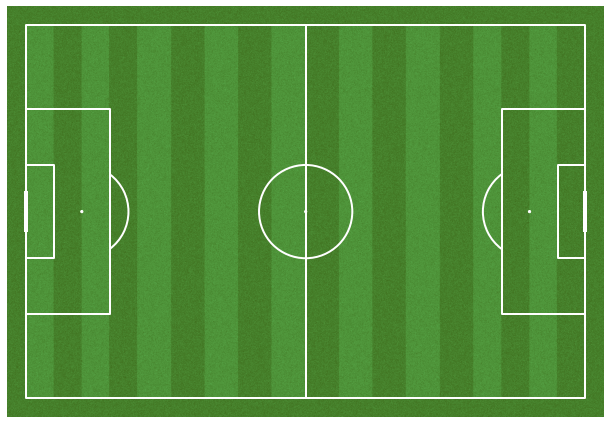

In [47]:
pitch = mplsoccer.Pitch(pitch_type='wyscout')
pitch = mplsoccer.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(14,6))

dưa các dữ liệu về dạng dữ liệu số

In [48]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [49]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 1388
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           2867 non-null   object 
 1   id               2867 non-null   int64  
 2   minute           2867 non-null   int64  
 3   result           2867 non-null   object 
 4   X                2867 non-null   float64
 5   Y                2867 non-null   float64
 6   xG               2867 non-null   float64
 7   player           2867 non-null   object 
 8   h_a              2867 non-null   object 
 9   player_id        2867 non-null   int64  
 10  situation        2867 non-null   object 
 11  season           2867 non-null   int64  
 12  shotType         2867 non-null   object 
 13  match_id         2867 non-null   int64  
 14  h_team           2867 non-null   object 
 15  a_team           2867 non-null   object 
 16  h_goals          2867 non-null   int64  
 17  a_goals       

In [50]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

làm tròn dữ liệu

In [51]:
shots_df = shots_df.round(2)

In [52]:
shots_df

Player      id  minute       result     X     Y    xG  \
0     Cristiano   32535      18    SavedShot  0.84  0.50  0.07   
1     Cristiano   32551      85  BlockedShot  0.77  0.62  0.03   
2     Cristiano   32552      89         Goal  0.71  0.67  0.02   
3     Cristiano   32912      13  MissedShots  0.82  0.24  0.02   
4     Cristiano   32917      25         Goal  0.88  0.50  0.74   
...         ...     ...     ...          ...   ...   ...   ...   
1384      Messi  496659      37  BlockedShot  0.78  0.61  0.03   
1385      Messi  496662      40    SavedShot  0.89  0.40  0.03   
1386      Messi  496668      54         Goal  0.71  0.49  0.02   
1387      Messi  500470      22  BlockedShot  0.82  0.55  0.04   
1388      Messi  500477      65   ShotOnPost  0.82  0.35  0.09   

                 player h_a  player_id  ... season   shotType match_id  \
0     Cristiano Ronaldo   h       2371  ...   2014  RightFoot     5834   
1     Cristiano Ronaldo   h       2371  ...   2014   LeftFoot     5834   
2     Cristiano Ronaldo   h       2371  ...   2014  RightFoot     5834   
3     Cristiano Ronaldo   h       2371  ...   2014  RightFoot     5789   
4     Cristiano Ronaldo   h       2371  ...   2014  RightFoot     5789   
...                 ...  ..        ...  ...    ...        ...      ...   
1384       Lionel Messi   h       2097  ...   2022   LeftFoot    19773   
1385       Lionel Messi   h       2097  ...   2022       Head    19773   
1386       Lionel Messi   h       2097  ...   2022   LeftFoot    19773   
1387       Lionel Messi   h       2097  ...   2022   LeftFoot    19793   
1388       Lionel Messi   h       2097  ...   2022   LeftFoot    19793   

                   h_team           a_team h_goals  a_goals  \
0             Real Madrid          Cordoba       2        0   
1             Real Madrid          Cordoba       2        0   
2             Real Madrid          Cordoba       2        0   
3             Real Madrid  Atletico Madrid       1        2   
4             Real Madrid  Atletico Madrid       1        2   
...                   ...              ...     ...      ...   
1384  Paris Saint Germain           Troyes       4        3   
1385  Paris Saint Germain           Troyes       4        3   
1386  Paris Saint Germain           Troyes       4        3   
1387  Paris Saint Germain          Auxerre       5        0   
1388  Paris Saint Germain          Auxerre       5        0   

                     date player_assisted lastAction  
0     2014-08-25 19:00:00     Luka Modric       Pass  
1     2014-08-25 19:00:00      Toni Kroos       Pass  
2     2014-08-25 19:00:00            Isco       Pass  
3     2014-09-13 19:00:00      Toni Kroos       Pass  
4     2014-09-13 19:00:00            None   Standard  
...                   ...             ...        ...  
1384  2022-10-29 15:00:00  Marco Verratti       Pass  
1385  2022-10-29 15:00:00     Juan Bernat    Chipped  
1386  2022-10-29 15:00:00    Sergio Ramos       Pass  
1387  2022-11-13 12:00:00          Neymar   HeadPass  
1388  2022-11-13 12:00:00          Neymar       Pass  

[2867 rows x 21 columns]

In [53]:
shots_df.describe(percentiles=[]).round(1)

id  minute       X       Y      xG  player_id  season  match_id  \
count    2867.0  2867.0  2867.0  2867.0  2867.0     2867.0  2867.0    2867.0   
mean   230777.3    48.2     0.8     0.5     0.2     2238.3  2017.4    8976.7   
std    143448.5    26.3     0.1     0.1     0.2      137.0     2.3    5260.2   
min     32522.0     0.0     0.5     0.0     0.0     2097.0  2014.0    1404.0   
50%    199822.0    48.0     0.9     0.5     0.1     2371.0  2017.0    8152.0   
max    500477.0    96.0     1.0     0.9     1.0     2371.0  2022.0   19793.0   

       h_goals  a_goals  
count   2867.0   2867.0  
mean       2.1      1.5  
std        1.8      1.5  
min        0.0      0.0  
50%        2.0      1.0  
max       10.0      8.0

Nhân dữ liệu X,Y (dữ liệu về địa chỉ sút bóng) cho 100 để vẽ

In [54]:
shots_df['X'] = shots_df['X'].multiply(100)
shots_df['Y'] = shots_df['Y'].multiply(100)

lấy các data của ronaldo và messi để truyền vào hình vẽ

In [55]:
cr7PlotData = shots_df[shots_df['Player'] == 'Cristiano'].copy(deep=True)

In [56]:
messiPlotData = shots_df[shots_df['Player'] == 'Messi'].copy(deep=True)

heatmap những cú sút của ronaldo và messi

Text(0.5, 1.0, 'Cristiano Shot HeatMap')

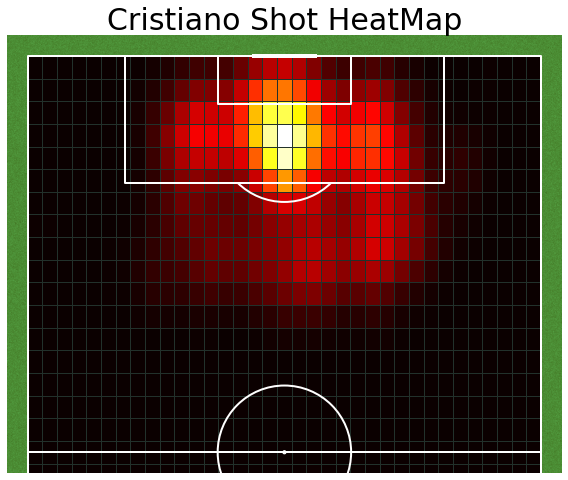

In [57]:
pitch = mplsoccer.VerticalPitch(pitch_type='wyscout',
                                line_color='white',
                                line_zorder=2,
                                 pitch_color='grass',
                                half=True,
                               )
fig, ax = pitch.draw(figsize=(8, 8))
bin_statistic = pitch.bin_statistic(cr7PlotData['X'],
                                    cr7PlotData['Y'],
                                    statistic='count',bins=(35,35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'],1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title('Cristiano Shot HeatMap', fontsize=30)

Text(0.5, 1.0, 'Messi Shot HeatMap')

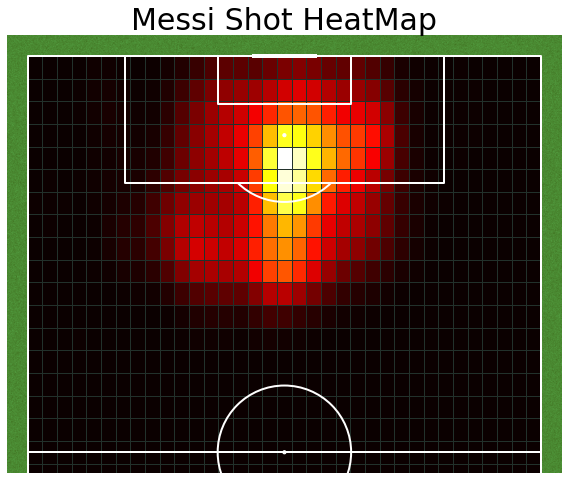

In [58]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='grass',
                                half=True)
fig, ax = pitch.draw(figsize=(8, 8))
bin_statistic = pitch.bin_statistic(messiPlotData["X"],
                                    messiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap", fontsize=30)

vì Penalty không phản ánh được vị trí sút nên ta loại bỏ những bàn thắng trên chấm 11m penalty

Text(0.5, 1.0, 'Messi Shot HeatMap')

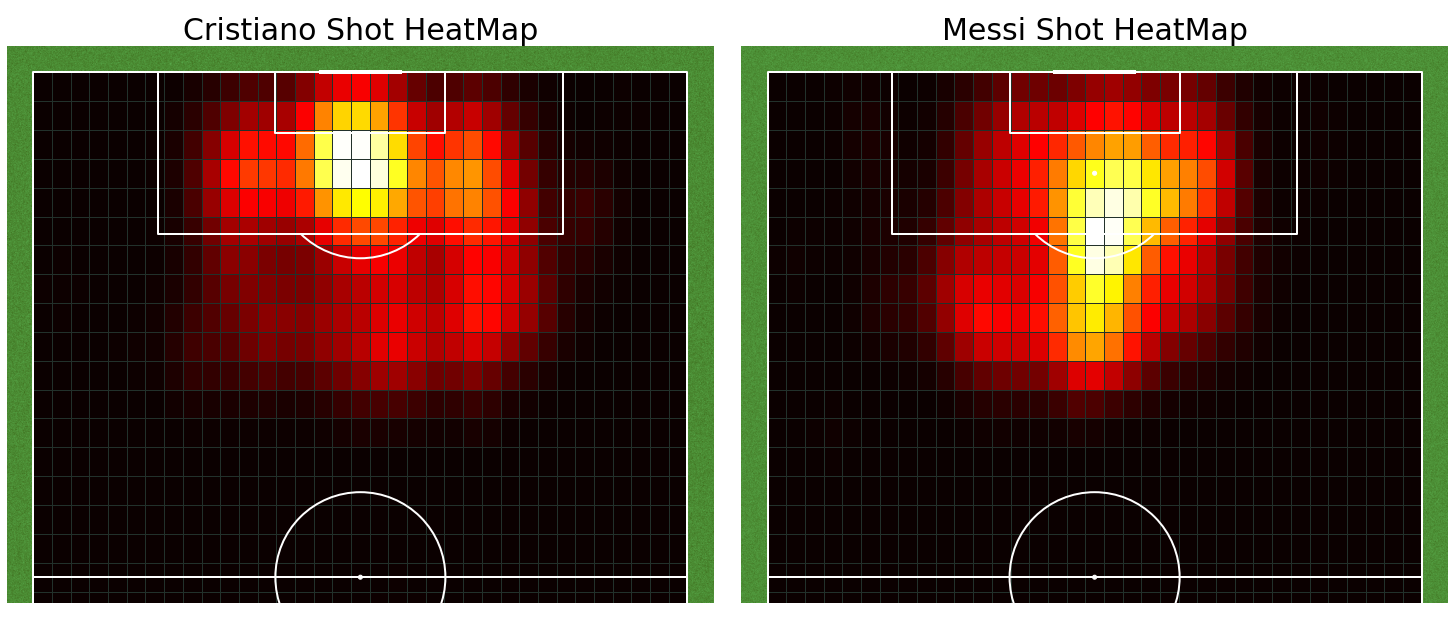

In [59]:
wopCr7PlotData = cr7PlotData.loc[cr7PlotData["situation"] != "Penalty"].copy(deep=True)
wopMessiPlotData = messiPlotData.loc[messiPlotData["situation"] != "Penalty"].copy(deep=True)

pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='grass',
                                half=True)
fig, axs = pitch.grid(nrows=1, ncols=2,
                     endnote_height=0.03, endnote_space=0,
                      grid_width=0.88, left=0.023,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)

# Cristiano:
ax = axs["pitch"][0]
bin_statistic = pitch.bin_statistic(wopCr7PlotData["X"],
                                    wopCr7PlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap", fontsize=30)

# Messi:
ax = axs["pitch"][1]
bin_statistic = pitch.bin_statistic(wopMessiPlotData["X"],
                                    wopMessiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap", fontsize=30)

Gộp các heatmap lại đễ đễ so sánh

Text(0.5, 1.0, 'Messi Shot HeatMap (no Pen)')

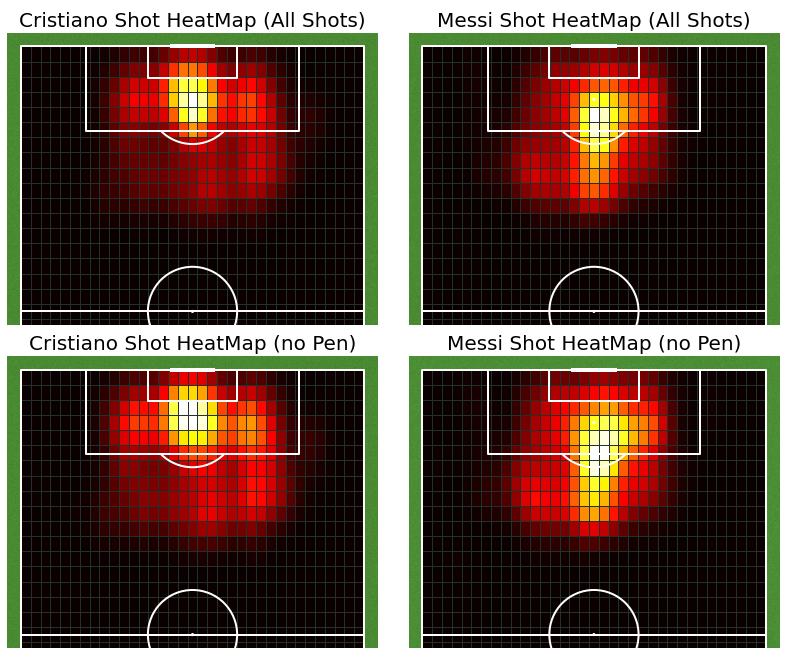

In [60]:
""" Shot Heatmaps (including and excluding penalties) """
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='grass',
                                half=True)
fig, axs = pitch.grid(nrows=2, ncols=2,
                      endnote_height=0.01, endnote_space=0,
                      grid_width=0.95, left=0.02,
                      title_height=0.04, title_space=0,
                      axis=False,
                      grid_height=0.95)

# Cristiano with pen:
ax = axs["pitch"][0, 0]
bin_statistic = pitch.bin_statistic(cr7PlotData["X"],
                                    cr7PlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap (All Shots)", fontsize=20)

# Messi with pen:
ax = axs["pitch"][0, 1]
bin_statistic = pitch.bin_statistic(messiPlotData["X"],
                                    messiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap (All Shots)", fontsize=20)

# Cristiano without pen:
ax = axs["pitch"][1, 0]
bin_statistic = pitch.bin_statistic(wopCr7PlotData["X"],
                                    wopCr7PlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap (no Pen)", fontsize=20)

# Messi wo pen:
ax = axs["pitch"][1, 1]
bin_statistic = pitch.bin_statistic(wopMessiPlotData["X"],
                                    wopMessiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='hot', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap (no Pen)", fontsize=20)

các cầu thủ kiến tạo để 2 cầu thủ này ghi bàn

In [61]:
fig = px.histogram(data_frame = shots_df, x = 'player_assisted', color = 'Player',
                   barmode='group', title = 'Assisting Player',
                   labels={'result':'','count': ''})
fig.update_layout(xaxis={'tickmode': 'linear'})

Đặc điểm của các bàn thắng 

In [62]:
shot_cols = ["result", "situation", "shotType"]

In [63]:
i = j = 1
# Tạo bố cục trống
fig = make_subplots(rows=1, cols=3,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=shot_cols)
# Thêm đồ thị vào:
for col in shot_cols:
    cr7_plot_df = cr7_shots_df[col].value_counts(normalize=True).multiply(100).round(1).reset_index()
    fig.add_trace(go.Bar(x=cr7_plot_df["index"],
                         y=cr7_plot_df[col],
                         text=cr7_plot_df[col].apply(lambda x: '{0:1.2f}%'.format(x)),
                         textposition="inside",
                         name=col + "(Cr7)"),
                  row=i, col=j)

    messi_plot_df = messi_shots_df[col].value_counts(normalize=True).multiply(100).round(1).reset_index()
    fig.add_trace(go.Bar(x=messi_plot_df["index"],
                         y=messi_plot_df[col],
                         text=messi_plot_df[col].apply(lambda x: '{0:1.2f}%'.format(x)),
                         textposition="inside",
                         name=col+ "(Messi)"),
                  row=i, col=j)

    j += 1
    if j > 3:
        j = 1
        i += 1
fig.update_layout(height=400, barmode="group",
                  plot_bgcolor="#383838",
                  #template="plotly_dark"
                 ) 
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Cuối cùng, ta dùng radar để mô tả các chỉ số cơ bản của 2 cầu thủ này.

Lọc dữ liệu cho để vẽ radar

In [64]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()
radar_df

Player  goals  shots   time      xG  assists      xA  key_passes  npg  \
0  Cristiano    234   1478  22571  229.45       57   52.20         366  183   
1      Messi    244   1389  23824  210.59      120  121.12         693  216   

     npxG  xGChain  xGBuildup  xGDiff  goal_contrib  xgoal_contrib  \
0  182.10   248.92      67.51    4.55           291          281.5   
1  181.58   344.86     142.22   33.41           364          331.6   

   shot_contrib  
0          1901  
1          2202

In [65]:
cols_for_radar = ['goals', 'xG', 'xGDiff',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'goal_contrib', 'xgoal_contrib']

In [66]:
# tạo một cái hình để vẽ:
fig = go.Figure()
# Thêm các hình radar vô:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].values.flatten(),#dưa dữ liệu vào
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"
))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
    template="plotly_dark"
)
fig.show()

vẽ lại với dữ liệu trong 90p

In [67]:
cols_for_radar = ['goals_p90',
 'xG_p90',
 'xGDiff_p90',
 'assists_p90',
 'xA_p90',
 'key_passes_p90',
 'npg_p90',
 'npxG_p90',
 'goal_contrib_p90',
 'xgoal_contrib_p90']

In [68]:
radar_df = season_wise_meta_df.groupby(["Player"])[cols_for_radar].sum().reset_index()

In [69]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True,
template="plotly_dark"
)
fig.show()